In [1]:
#%reset
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation

df = preprocessing.load_relevant_data()

In [2]:
df_transformed = df
df_transformed["temperature"] = df_transformed["temperature"].apply(lambda x: 4*x if x < 0 else (1.25*x if x > 8 else x))

In [3]:
df = preprocessing.load_relevant_data()

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x = df["temperature"],y = df_transformed["temperature"])
plt.xlabel("Original Temperature values")
plt.ylabel("Transformed Temperature Values")

Text(0.5, 0, 'Original Temperature values')

Text(0, 0.5, 'Transformed Temperature Values')

Feature Extraction: 100%|██████████| 30/30 [00:05<00:00,  5.10it/s]


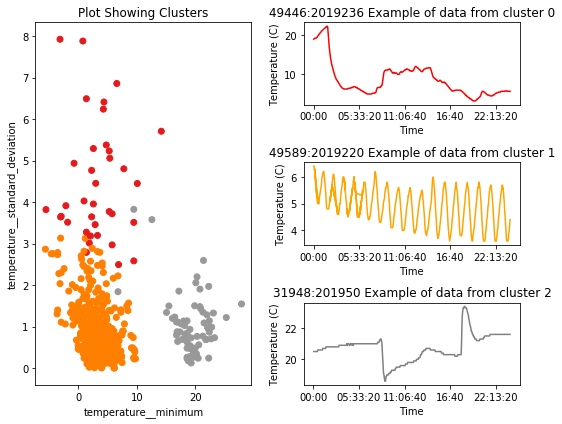

Feature Extraction: 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


In [5]:
from medangel.visualization import viz_creation
viz_creation.create_multiple_figure(df)
viz_creation.create_multiple_figure(df_transformed)

In [6]:
minimum_features = feature_creation.extract_minimum_features(df_transformed)
kmeans_minimum,scaled_minimum = model_builder.kmeans_clustering(minimum_features)
viz_creation.create_heatmap(minimum_features)

Feature Extraction: 100%|██████████| 30/30 [00:05<00:00,  5.62it/s]


In [7]:
scaled_df = pd.DataFrame(scaled_minimum, columns = minimum_features.columns)
covMatrix = pd.DataFrame.cov(scaled_df)
foi = abs(covMatrix).stack().idxmin()

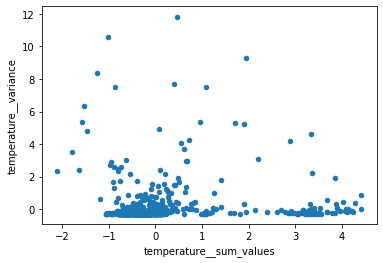

In [8]:
scaled_df.plot.scatter(x=foi[0],y=foi[1])